In [189]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import scipy.optimize as op
%matplotlib inline

In [3]:
X = np.array([[0,0]])
y = np.array([[]])
with open('ex2data1.txt', 'r+') as txtfile:
        for line in txtfile:
            scores = line.split(',')
            admision = int(scores[-1])
            scores = [float(score) for score in scores[:-1]] 
            y = np.append(y, np.array([[admision]]),axis=1)
            X = np.append(X, np.array([scores]),axis=0)

In [126]:
#X = X[1:,:]
#y = y.T
y
b = np.random.rand()

TypeError: 'numpy.float64' object cannot be interpreted as an index

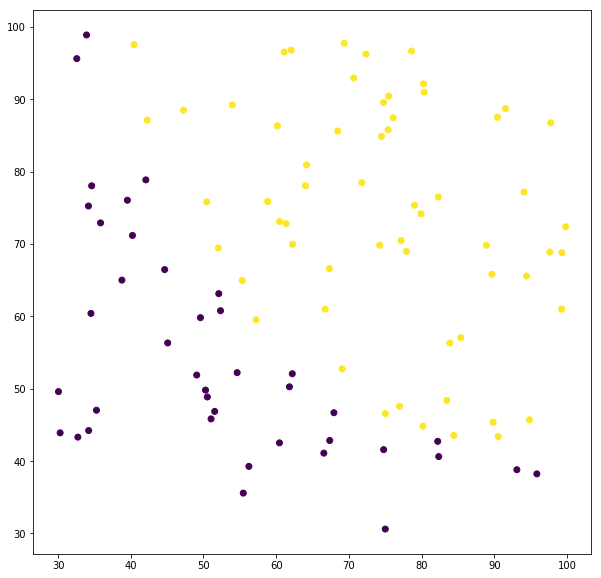

In [199]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c = y[:,0])
x1 = range(0,101)
x2 =np.round( (weight[0][0] * x1 + b) / weight[0][1])
plt.plot(x1, x2, 'o')

In [100]:
from __future__ import division
def sigmoid(a):
    return 1. / (1. + np.exp(-1 * a))

In [179]:
alpha = 5e-8
def logistic_regression(weight):
    global b 
    for i in range(1,300000):
        z = np.dot(X,weight) + b# dimension is (m,n) . (n,1) = (m,1)
        a = sigmoid(z)
        dz = a - y #target - prediction
        db = np.sum(dz) / X.shape[0]
        #dw = np.dot(dz.transpose(), X) #dimension is (1,n) = (1,m) * (m,n) correct
        dw = np.dot(X.T, dz) / X.shape[0] #(n,m) * (m,1) = n,1
        weight -= alpha * dw
        b -= alpha * db 
    print b    
    return weight

In [192]:
def costfunction(weight,X,target):
    global b
    pred = sigmoid(np.dot(X,weight) + b) 
    J = -1  * (np.sum(target * np.log(pred) + (1 - target)* np.log(1- pred))) / X.shape[0]
    return J
    

In [181]:
from __future__ import division
def accuracy(weight,target):
    global b
    print b
    pred = np.round(sigmoid(np.dot(X, weight) + b)) 
    print np.sum(pred==target) / len(pred)
    print np.sum(pred==target)

In [194]:
weight = np.zeros((X.shape[1],1))
weight = logistic_regression(weight)
#print costfunction(weight, y, b)
accuracy(weight, y)

0.501719290406
0.501719290406
0.6
60


In [183]:
prob = sigmoid(np.dot(np.array([[45,85]]), weight) + b)
costfunction(weight,1,np.array([[45,85]]))


0.44353617390943961

In [186]:
def Gradient(weight ,X,y):
    z = np.dot(X,weight) + b# dimension is (m,n) . (n,1) = (m,1)
    a = sigmoid(z)
    dz = a - y #target - prediction
    db = np.sum(dz) / X.shape[0]
    #dw = np.dot(dz.transpose(), X) #dimension is (1,n) = (1,m) * (m,n) correct
    dw = np.dot(X.T, dz) / X.shape[0] #(n,m) * (m,1) = n,1
    return dw

In [ ]:
result = op.minimize(fun = costfunction, x0 =np.zeros((X.shape[1],1)) , args = (X, y), method = 'TNC',jac = Gradient);